In [ ]:
import pandas as pd

In [ ]:
sep14 = pd.read_csv("uber-raw-data-sep14.csv", encoding = 'utf-8')
sep14.head()

Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512

<div align="Justify">

The aim of this project is to help Uber find the areas with the highest demand, according to the time of day. And then recommend to the drivers where to be, according to the time periods, in order to get as many rides as possible.

We had an enormous amount of data at our disposal, so we're going to focus on NY and the data from September 2014. I chose September because it's outside the vacation period and will be more representative of the year as a whole.

</div>

# EDA AND CLEANING DATA

In [ ]:
print('Description dataset : ')
print()
display(sep14.describe(include='all'))
print()
display()
print("Percentage of missing values: ")
display(100*sep14.isnull().sum()/sep14.shape[0])

Description dataset : 



Date/Time           Lat           Lon     Base
count              1028136  1.028136e+06  1.028136e+06  1028136
unique               42907           NaN           NaN        5
top     9/13/2014 18:44:00           NaN           NaN   B02617
freq                    82           NaN           NaN   377695
mean                   NaN  4.073922e+01 -7.397182e+01      NaN
std                    NaN  4.082861e-02  5.831413e-02      NaN
min                    NaN  3.998970e+01 -7.477360e+01      NaN
25%                    NaN  4.072040e+01 -7.399620e+01      NaN
50%                    NaN  4.074180e+01 -7.398310e+01      NaN
75%                    NaN  4.076120e+01 -7.396280e+01      NaN
max                    NaN  4.134760e+01 -7.271630e+01      NaN


Percentage of missing values: 


Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

In [ ]:
uber = sep14.sample(n=100000)

In [ ]:
display(uber.head())
display(uber.shape)

Date/Time      Lat      Lon    Base
407307   9/11/2014 8:57:00  40.7530 -73.9786  B02617
93582    9/8/2014 13:32:00  40.7138 -73.9982  B02598
252844  9/27/2014 20:27:00  40.7404 -73.9233  B02598
930737  9/17/2014 12:58:00  40.6714 -73.9626  B02764
852284   9/1/2014 19:25:00  40.7067 -73.9142  B02764

(100000, 4)

In [ ]:
# Date column
uber['Date'] = pd.to_datetime(uber['Date/Time'])
uber['time'] = uber['Date'].dt.time
uber['day_of_week'] = uber['Date'].dt.day_name()
uber['Day'] = uber['Date'].dt.day
uber['Hour'] = uber['Date'].dt.hour

In [ ]:
uber.describe(include='all')

<ipython-input-7-05b1740ab3d3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  uber.describe(include='all')


Date/Time            Lat            Lon    Base  \
count               100000  100000.000000  100000.000000  100000   
unique               34536            NaN            NaN       5   
top     9/19/2014 17:16:00            NaN            NaN  B02617   
freq                    14            NaN            NaN   36846   
first                  NaN            NaN            NaN     NaN   
last                   NaN            NaN            NaN     NaN   
mean                   NaN      40.739021     -73.971783     NaN   
std                    NaN       0.040569       0.058294     NaN   
min                    NaN      40.112200     -74.659900     NaN   
25%                    NaN      40.720300     -73.996200     NaN   
50%                    NaN      40.741700     -73.983100     NaN   
75%                    NaN      40.761200     -73.963075     NaN   
max                    NaN      41.209200     -72.755800     NaN   

                       Date      time day_of_week            Day  \
count                100000    100000      100000  100000.000000   
unique                34536      1440           7            NaN   
top     2014-09-19 17:16:00  17:16:00    Saturday            NaN   
freq                     14       154       15996            NaN   
first   2014-09-01 00:00:00       NaN         NaN            NaN   
last    2014-09-30 22:58:00       NaN         NaN            NaN   
mean                    NaN       NaN         NaN      15.572500   
std                     NaN       NaN         NaN       8.440181   
min                     NaN       NaN         NaN       1.000000   
25%                     NaN       NaN         NaN       8.000000   
50%                     NaN       NaN         NaN      16.000000   
75%                     NaN       NaN         NaN      23.000000   
max                     NaN       NaN         NaN      30.000000   

                 Hour  
count   100000.000000  
unique            NaN  
top               NaN  
freq              NaN  
first             NaN  
last              NaN  
mean        14.090830  
std          5.961231  
min          0.000000  
25%         10.000000  
50%         15.000000  
75%         19.000000  
max         23.000000

<Axes: xlabel='day_of_week', ylabel='Count'>

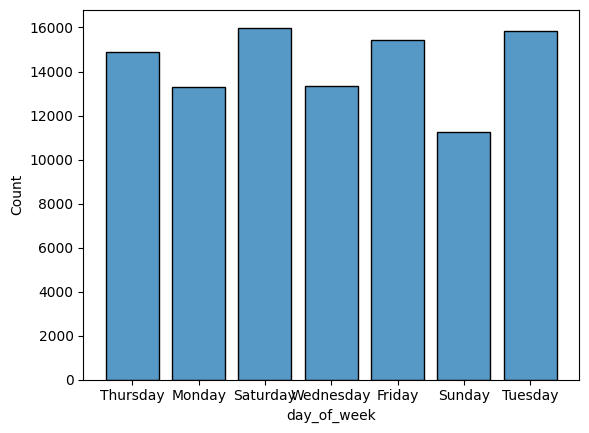

In [ ]:
# visualisation number per day
import seaborn as sns

sns.histplot(uber, x='day_of_week', shrink=.8)

In [ ]:
import plotly.express as px

fig1 = px.scatter_mapbox(uber, lat="Lat", lon="Lon" , color ="day_of_week", zoom=10, mapbox_style="carto-positron")
fig1.show()

<Axes: xlabel='Hour', ylabel='Count'>

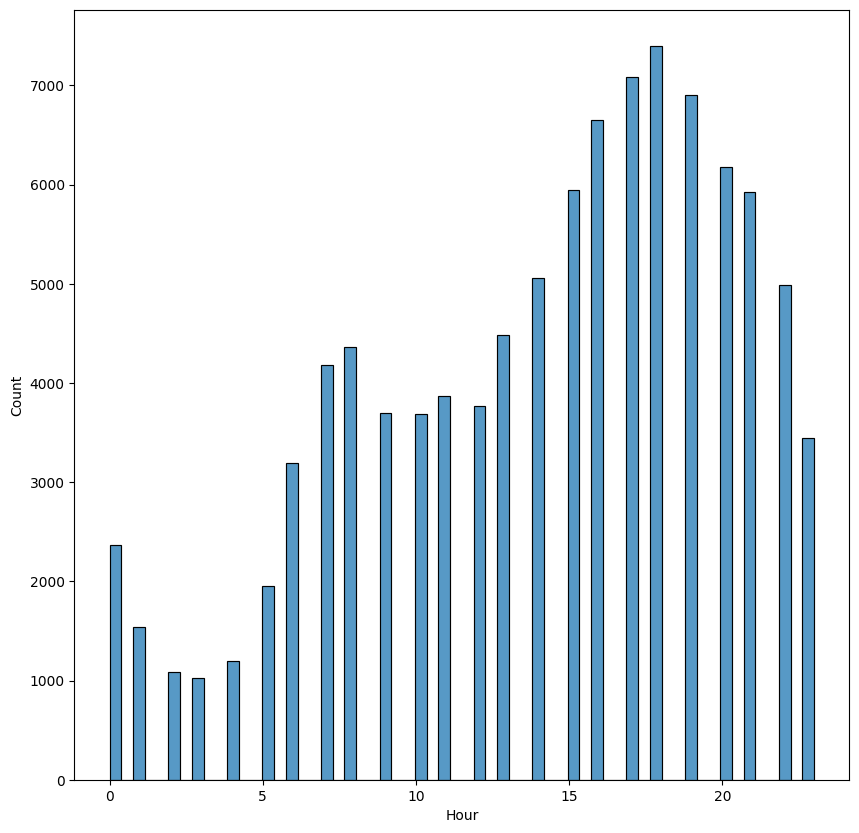

In [ ]:
# visualisation number per hour
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.histplot(uber, x='Hour')

In [ ]:
# data repartition per hour and per day
import plotly.express as px

fig = px.histogram(uber, x="Hour", color="day_of_week")
fig.update_layout(bargap=0.1)
fig.show()

<div align="Justify">

The first histogram shows a slight increase in the number of races on Tuesdays and Saturdays. And the day with the fewest races is Sunday.

On the map, at first glance, you can't see which areas are more involved depending on the day of the week. All the races are fairly mixed.

On the second histogram, however, we can see that there is a big difference in the number of races depending on the time of day. In the morning, there's a peak between 7am and 9am, and in the afternoon between 4pm and 8pm. This is very reminiscent of office hours.

On the last histogram, showing the distribution of data by time of day, we can see that, for example, the increase in the number of journeys during the morning peak between 7 and 9 a.m. is affected by all weekdays, with little impact on Saturdays and Sundays. Conversely, in the evenings after 8pm, Fridays and Saturdays are more present. This corresponds to people's weekend nightlife.

So we're going to look at peak working days. We'll try to determine clusters for those hours with the most shopping.

</div>

# Dataset for machine learning

In [ ]:
# Selection of UBER runs on weekdays during rush hour

# mask business day
week_day = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
mask_day = uber["day_of_week"].isin(week_day)

# mask for hour
mask_hour = ((uber["Hour"] >= 7) & (uber["Hour"] <= 9)) | ((uber["Hour"] >= 16) & (uber["Hour"] <= 20))

# News df
uber_week = uber[mask_day & mask_hour]

In [ ]:
uber_week.head()

Date/Time      Lat      Lon    Base                Date  \
407307   9/11/2014 8:57:00  40.7530 -73.9786  B02617 2014-09-11 08:57:00   
852284   9/1/2014 19:25:00  40.7067 -73.9142  B02764 2014-09-01 19:25:00   
519938  9/19/2014 18:25:00  40.7811 -73.9797  B02617 2014-09-19 18:25:00   
38364    9/1/2014 20:51:00  40.7687 -73.9852  B02598 2014-09-01 20:51:00   
966440  9/22/2014 17:27:00  40.7279 -74.0047  B02764 2014-09-22 17:27:00   

            time day_of_week  Day  Hour  
407307  08:57:00    Thursday   11     8  
852284  19:25:00      Monday    1    19  
519938  18:25:00      Friday   19    18  
38364   20:51:00      Monday    1    20  
966440  17:27:00      Monday   22    17

In [ ]:
# Eliminate useless columns
useless_cols = ['Date/Time', 'Base', 'Date', 'Day', 'time', 'day_of_week']

print("The following columns will be discarded : ", useless_cols)
uber_week = uber_week.drop(useless_cols, axis=1)
print("...done.")
print()
print(uber_week.shape)
uber_week.head()

The following columns will be discarded :  ['Date/Time', 'Base', 'Date', 'Day', 'time', 'day_of_week']
...done.

(35768, 3)


Lat      Lon  Hour
407307  40.7530 -73.9786     8
852284  40.7067 -73.9142    19
519938  40.7811 -73.9797    18
38364   40.7687 -73.9852    20
966440  40.7279 -74.0047    17

In [ ]:
uber_week.describe(include='all')

Lat           Lon          Hour
count  35768.000000  35768.000000  35768.000000
mean      40.741276    -73.974171     15.083175
std        0.037424      0.053254      4.714998
min       40.295100    -74.652700      7.000000
25%       40.723000    -73.995800      9.000000
50%       40.744900    -73.983000     17.000000
75%       40.761500    -73.967700     19.000000
max       41.162000    -72.879900     20.000000

In [ ]:
uber_week_only_coordinates = uber_week.drop('Hour', axis=1)
uber_week_only_coordinates

Lat      Lon
407307  40.7530 -73.9786
852284  40.7067 -73.9142
519938  40.7811 -73.9797
38364   40.7687 -73.9852
966440  40.7279 -74.0047
...         ...      ...
764956  40.7591 -73.9100
555839  40.7511 -73.9730
413273  40.7486 -73.9927
761330  40.7241 -73.9826
236458  40.7234 -73.9998

[35768 rows x 2 columns]

# KMEANS


<div align="Justify">

Now that we have a dataset of over 35,000 rows with only the days of the week at peak times, we're going to do some clustering. For this first Kmeans model, we'll try to cluster only according to the geographical position of the UBER pick-ups.  To determine the optimal number of Ks, I have chosen to try both the Elbow and Silhouette methods.

</div>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

In [ ]:
 # to normalize variables
scaler = StandardScaler()

#  Preprocessing on dataset
print("Preprocessing on train set...")
print(uber_week_only_coordinates.head())
X = scaler.fit_transform(uber_week_only_coordinates)
print('...Done.')
print(X[0:5, :])
print()

Preprocessing on train set...
            Lat      Lon
407307  40.7530 -73.9786
852284  40.7067 -73.9142
519938  40.7811 -73.9797
38364   40.7687 -73.9852
966440  40.7279 -74.0047
...Done.
[[ 0.3132902  -0.08316598]
 [-0.92389798  1.12614168]
 [ 1.06415387 -0.10382186]
 [ 0.73281189 -0.20710124]
 [-0.35741009 -0.57327359]]



In [ ]:
# Using the Elbow method to find the optimal number of clusters

wcss =  []
for i in range (2,50):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
fig = px.line(x = range(2,50), y = wcss)
fig.show()

In [ ]:
# Check with silhouette_score to determine the optimal number of clusters
s_score = []
for i in range (2,50):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X)
    s_score.append(silhouette_score(X, kmeans.predict(X)))

# print(s_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
# Display scores based on the number of clusters
fig = px.bar(x = range(2,50), y = s_score)
fig.show()

In [ ]:
# We re-train a KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters= 20)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=20)

In [ ]:
uber_week_only_coordinates.loc[:,'Cluster_KMeans'] = kmeans.predict(X)
uber_week_only_coordinates.head()

Lat      Lon  Cluster_KMeans
407307  40.7530 -73.9786               1
852284  40.7067 -73.9142               3
519938  40.7811 -73.9797              12
38364   40.7687 -73.9852               1
966440  40.7279 -74.0047              16

In [ ]:
fig = px.scatter_mapbox(uber_week_only_coordinates, lat="Lat", lon="Lon" , color ="Cluster_KMeans", zoom=10, mapbox_style="carto-positron")
fig.show()

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[ 1.87542831,  0.44376906],
       [ 0.46816555, -0.07609446],
       [-2.53407199,  3.60043254],
       [-1.44427213,  0.82239982],
       [-1.17594001, -3.86534379],
       [-0.7683201 , -0.65037719],
       [ 7.46777514,  4.08379646],
       [ 0.72895588,  1.87006541],
       [ 0.08070843, -0.35513021],
       [-1.61083662, -0.148608  ],
       [ 1.97648949, 17.12344719],
       [ 0.35323125,  7.29790007],
       [ 0.95975946,  0.21370976],
       [-0.58383425,  0.41749399],
       [-3.11635942, -0.0932419 ],
       [-0.32180128,  2.96267768],
       [-0.3829342 , -0.40086348],
       [-5.64433352, -8.94516283],
       [ 3.44943096,  1.46508203],
       [ 3.63310682, -3.53827383]])

In [ ]:
# Let's use inverse transform to have the real coordinates
centroid_coordinates = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_coordinates

array([[ 40.81146079, -73.95053881],
       [ 40.75879599, -73.97822342],
       [ 40.64644154, -73.78243508],
       [ 40.68722574, -73.93037535],
       [ 40.69726769, -74.18001463],
       [ 40.71252228, -74.00880604],
       [ 41.02074638, -73.7566942 ],
       [ 40.76855569, -73.87458337],
       [ 40.74429596, -73.99308308],
       [ 40.6809923 , -73.98208502],
       [ 40.81524286, -73.06228571],
       [ 40.75449474, -73.58553158],
       [ 40.77719319, -73.96279029],
       [ 40.7194264 , -73.95193805],
       [ 40.62465026, -73.97913658],
       [ 40.72923261, -73.81639783],
       [ 40.7269448 , -73.99551854],
       [ 40.53004444, -74.45053333],
       [ 40.87036559, -73.8961502 ],
       [ 40.87723939, -74.16259697]])

In [ ]:
type(centroid_coordinates)

numpy.ndarray

In [ ]:
centroid_coordinates = pd.DataFrame(centroid_coordinates, columns=("Lat", "Lon"))
centroid_coordinates

Lat        Lon
0   40.811461 -73.950539
1   40.758796 -73.978223
2   40.646442 -73.782435
3   40.687226 -73.930375
4   40.697268 -74.180015
5   40.712522 -74.008806
6   41.020746 -73.756694
7   40.768556 -73.874583
8   40.744296 -73.993083
9   40.680992 -73.982085
10  40.815243 -73.062286
11  40.754495 -73.585532
12  40.777193 -73.962790
13  40.719426 -73.951938
14  40.624650 -73.979137
15  40.729233 -73.816398
16  40.726945 -73.995519
17  40.530044 -74.450533
18  40.870366 -73.896150
19  40.877239 -74.162597

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig = px.scatter_mapbox(uber_week_only_coordinates, lat="Lat", lon="Lon" , color ="Cluster_KMeans", zoom=10, mapbox_style="carto-positron")

fig.add_trace(go.Scattermapbox(
        lat=centroid_coordinates['Lat'],
        lon=centroid_coordinates['Lon'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color='rgb(255, 0, 0)'
        )
    ))

fig.update_layout(
    title='Recommandation Position'
)


fig.show()

In [ ]:
uber_week_only_coordinates['Cluster_KMeans'].value_counts()

1     8589
8     6840
16    5780
12    4007
5     2922
9     1674
13    1328
7     1203
0      737
2      650
3      638
14     380
4      294
15     276
18     247
11      76
6       69
19      33
17      18
10       7
Name: Cluster_KMeans, dtype: int64

<div align="Justify">

I relied on the Elbow method, which is more relevant in this case. The Elbow method looks at the distance between points, whereas the Silhouette method looks at the distance between clusters, which is less relevant here as the races are very close together. Silhouette no longer detects major changes beyond 3 clusters. Relying on the Elbow method, we re-train the k-means with the optimal number of Ks, which is 20.

By assigning each coordinate to its cluster, we can see the markings of the clusters by NY neighborhood very clearly. To find out more, we extract the coordinates of the centroids and display them on the map. We can see a strong concentration in the center, and more scattered data on the outside of the city. We can see that there is a disparity in the density of clusters, with the largest at 8313 and the smallest at just 16.

</div>

# DBSCAN

<div align="justify">

Here, the goal was to find out whether another type of clustering algorithm might perform better. Here we use DBSCAN, which creates its clusters based on the density of points in the observation space. Another special feature of DBSCAN is that we don't have to define the number of clusters upstream. It chooses the optimal number of clusters on its own. We can, however, adapt the parameters epsilon, which is the size of the radius in which the points must lie, and min_sample, which is the minimum number of subjects per cluster. Here as well, we could adapt the distance metric by choosing the 'Manhattan' distance, which is better suited to the geographic coordinates problem described here.

</div>

In [ ]:
uber_week_dbscan = uber_week.drop('Hour', axis=1)
uber_week_dbscan

Lat      Lon
407307  40.7530 -73.9786
852284  40.7067 -73.9142
519938  40.7811 -73.9797
38364   40.7687 -73.9852
966440  40.7279 -74.0047
...         ...      ...
764956  40.7591 -73.9100
555839  40.7511 -73.9730
413273  40.7486 -73.9927
761330  40.7241 -73.9826
236458  40.7234 -73.9998

[35768 rows x 2 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import  silhouette_score
from sklearn.metrics import pairwise_distances

In [ ]:
 # to normalize variables
scaler = StandardScaler()

#  Preprocessing on dataset
print("Preprocessing on train set...")
print(uber_week_dbscan.head())
X_db = scaler.fit_transform(uber_week_dbscan)
print('...Done.')
print(X_db[0:5, :])
print()

Preprocessing on train set...
            Lat      Lon
407307  40.7530 -73.9786
852284  40.7067 -73.9142
519938  40.7811 -73.9797
38364   40.7687 -73.9852
966440  40.7279 -74.0047
...Done.
[[ 0.3132902  -0.08316598]
 [-0.92389798  1.12614168]
 [ 1.06415387 -0.10382186]
 [ 0.73281189 -0.20710124]
 [-0.35741009 -0.57327359]]



In [ ]:
# Instanciate DBSCAN
db = DBSCAN(eps=0.1, min_samples=50, metric="manhattan", algorithm="brute")

# Fit on data
db.fit(X_db)

DBSCAN(algorithm='brute', eps=0.1, metric='manhattan', min_samples=50)

In [ ]:
import numpy as np
np.unique(db.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
uber_week_dbscan['Cluster_DBSCAN'] = db.labels_
uber_week_dbscan.head()

Lat      Lon  Cluster_DBSCAN
407307  40.7530 -73.9786               0
852284  40.7067 -73.9142              -1
519938  40.7811 -73.9797               0
38364   40.7687 -73.9852               0
966440  40.7279 -74.0047               0

In [ ]:
fig = px.scatter_mapbox(uber_week_dbscan, lat="Lat", lon="Lon" , color ="Cluster_DBSCAN", zoom=10, mapbox_style="carto-positron")
fig.show()

In [ ]:
uber_week_dbscan['Cluster_DBSCAN'].value_counts()

 0     27510
-1      3942
 2      1054
 1       791
 3       785
 6       600
 5       237
 7       191
 4       158
 8       108
 9        96
 12       86
 10       83
 13       68
 11       59
Name: Cluster_DBSCAN, dtype: int64

<div align="Justify">

Even when trying to adapt and play with epsilon and min_sample, DBSCAN doesn't perform well on this type of data. The difference in data density between the center and the outside of the city can make it difficult for DBSCAN to interpret the data. The result of clustering is not relevant for uber, which wants to know more precisely where to place its drivers. This is a pity, because with a Manhattan distance, it could have been interesting later to define the distance covered by ubers in 7 min on average over these hours, to combine it with the density of the number of trips and to distribute the drivers in the clusters so that all zones are covered in less than 7 min and in sufficient quantity for the zone.

</div>

# KMEANS PER HOUR


As the K Means model has been relevant, we'll try to refine it and see if the model can adjust these clusters for each peak hour.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

In [ ]:
 # to normalize variables
scaler = StandardScaler()

#  Preprocessing on dataset
print("Preprocessing on train set...")
print(uber_week.head())
X_hour = scaler.fit_transform(uber_week)
print('...Done.')
print(X_hour[0:5, :])
print()

Preprocessing on train set...
            Lat      Lon  Hour
407307  40.7530 -73.9786     8
852284  40.7067 -73.9142    19
519938  40.7811 -73.9797    18
38364   40.7687 -73.9852    20
966440  40.7279 -74.0047    17
...Done.
[[ 0.3132902  -0.08316598 -1.50228566]
 [-0.92389798  1.12614168  0.83072778]
 [ 1.06415387 -0.10382186  0.61863565]
 [ 0.73281189 -0.20710124  1.04281992]
 [-0.35741009 -0.57327359  0.40654352]]



In [ ]:
# Using the Elbow method to find the optimal number of clusters

wcss =  []
for i in range (2,50):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(X_hour)
    wcss.append(kmeans.inertia_)

# print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
fig = px.line(x = range(2,50), y = wcss)
fig.show()

In [ ]:
# We re-train a KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters= 20)
kmeans.fit(X_hour)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=20)

In [ ]:
uber_week.loc[:,'Cluster_KMeans_hours'] = kmeans.predict(X_hour)
uber_week.head()

Lat      Lon  Hour  Cluster_KMeans_hours
407307  40.7530 -73.9786     8                    15
852284  40.7067 -73.9142    19                     3
519938  40.7811 -73.9797    18                     2
38364   40.7687 -73.9852    20                     6
966440  40.7279 -74.0047    17                    12

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[-0.16312838, -0.41160118,  0.82323592],
       [-0.43322422, -0.33082236, -1.51704102],
       [ 1.18886021,  0.28676924,  0.56422941],
       [-0.82300008,  0.50955014,  0.67298647],
       [ 0.45165592,  1.98212469, -1.48995473],
       [-2.46170663,  3.57041946,  0.30235249],
       [ 0.47483998, -0.05211408,  0.83794309],
       [ 7.46777514,  4.08379646, -0.11292851],
       [-5.64433352, -8.94516283, -0.26508156],
       [ 0.61605006,  2.03894077,  0.62767917],
       [ 3.41656548,  1.18129839, -0.09323794],
       [-1.99947045, -0.06043369,  0.66044227],
       [-0.64998675, -0.54451477,  0.51783141],
       [-1.01620014, -3.94741468,  0.15119576],
       [ 1.03440824,  0.20886494, -1.54379551],
       [ 0.31173605, -0.20802791, -1.50657697],
       [ 1.97648949, 17.12344719,  0.52773902],
       [-1.78910101,  0.08606934, -1.52079802],
       [ 0.32948816,  6.75963991,  0.1179233 ],
       [ 0.3077868 , -0.18052267,  0.3397997 ]])

In [ ]:
# Let's use inverse transform to have the real coordinates
centroid_coordinates = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_coordinates

array([[ 40.73517072, -73.99609036,  18.96467639],
       [ 40.72506276, -73.9917886 ,   7.93042952],
       [ 40.78576696, -73.95889961,  17.74347826],
       [ 40.71047596, -73.94703573,  18.25626043],
       [ 40.75817814, -73.86861581,   8.05813953],
       [ 40.64914971, -73.78403338,  16.50874636],
       [ 40.75904577, -73.97694637,  19.0340197 ],
       [ 41.02074638, -73.7566942 ,  14.55072464],
       [ 40.53004444, -74.45053333,  13.83333333],
       [ 40.76433036, -73.86559015,  18.04263959],
       [ 40.86913564, -73.91126271,  14.64356436],
       [ 40.66644824, -73.97738942,  18.19711538],
       [ 40.71695074, -74.00316849,  17.52471483],
       [ 40.70324572, -74.1843852 ,  15.79605263],
       [ 40.77998681, -73.9630483 ,   7.80428391],
       [ 40.75294184, -73.98524935,   7.9797668 ],
       [ 40.81524286, -73.06228571,  17.57142857],
       [ 40.67432101, -73.96958761,   7.91271552],
       [ 40.75360619, -73.61419588,  15.63917526],
       [ 40.75279404, -73.98378

In [ ]:
type(centroid_coordinates)

numpy.ndarray

In [ ]:
centroid_coordinates = pd.DataFrame(centroid_coordinates, columns =['Lat', 'Lon', 'Hour'])
centroid_coordinates

Lat        Lon       Hour
0   40.735171 -73.996090  18.964676
1   40.725063 -73.991789   7.930430
2   40.785767 -73.958900  17.743478
3   40.710476 -73.947036  18.256260
4   40.758178 -73.868616   8.058140
5   40.649150 -73.784033  16.508746
6   40.759046 -73.976946  19.034020
7   41.020746 -73.756694  14.550725
8   40.530044 -74.450533  13.833333
9   40.764330 -73.865590  18.042640
10  40.869136 -73.911263  14.643564
11  40.666448 -73.977389  18.197115
12  40.716951 -74.003168  17.524715
13  40.703246 -74.184385  15.796053
14  40.779987 -73.963048   7.804284
15  40.752942 -73.985249   7.979767
16  40.815243 -73.062286  17.571429
17  40.674321 -73.969588   7.912716
18  40.753606 -73.614196  15.639175
19  40.752794 -73.983785  16.685307

In [ ]:
uber_week['Cluster_KMeans_hours'].value_counts()

19    5752
6     4470
0     4387
12    4214
1     3307
15    2915
14    2381
2     2071
11    1250
3     1196
9      983
17     928
5      686
4      430
13     304
10     303
18      97
7       69
8       18
16       7
Name: Cluster_KMeans_hours, dtype: int64

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig = px.scatter_mapbox(uber_week, lat="Lat", lon="Lon" , color ="Cluster_KMeans_hours", zoom=10, mapbox_style="carto-positron")

fig.add_trace(go.Scattermapbox(
        lat=centroid_coordinates['Lat'],
        lon=centroid_coordinates['Lon'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=10,
            color='rgb(255, 0, 0)'
        )
    ))

fig.update_layout(
    title='Recommandation Position'
)


fig.show()

In [ ]:
uber_week = uber_week.sort_values(by = 'Hour')

In [ ]:
fig = px.density_mapbox(uber_week, lat="Lat", lon="Lon", mapbox_style="carto-positron",
                       animation_frame = 'Hour', radius = 10)
fig.show()

In [ ]:
fig = px.scatter_mapbox(uber_week, lat="Lat", lon="Lon", color="Cluster_KMeans_hours",
                        mapbox_style="carto-positron",
                       animation_frame = 'Hour')
fig.show()

<div align="Justify">

For this model, we kept 20 clusters as well, corresponding to the moment when the within-cluster sum of square (wcss) descent of the Elbow method falls below 10k, and stops decreasing significantly for each additional cluster.


On the first map, we can see that we have different clusters. The clusters are blending, we no longer have geometric clusters, and we can see that the clusters overlap. Thanks to the density map and the last map, which represents the clusters across the hours, we can see that the model has been able to adapt the clusters according to the hours.

</div>

# CONCLUSION

<div align="Justify">

We don't propose the dbscan model to UBER, as the results are too unsatisfactory. Uber can use a K-means clustering model to establish hot-spots.

Here we already have good results with only part of the dataset. Uber can refine the project, and create clusters for each slot. By hour and day, vacation period, nights, weekends, etc.

As customers cancel if the wait is longer than 7 min, they can use this method to distribute drivers within clusters and cover the whole area in less than 7 min. Uber could also use trip density and driver location to suggest areas with more trips to take based on the density of drivers already there.

Uber can use all this to deploy its drivers in an intelligent way and avoid losing any more customers.

</div>